Travelling Salesman Problem (TSP): Local Search

In [38]:
import matplotlib.pyplot as plt

In [1]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2
from routing.tsp_ortools import utils as ortools_utils, ortools_tsp

In [30]:
from routing.tsp_local_search import utils as ls_utils, two_opt

# Input data

In [3]:
input_data = ortools_utils.read_input_data("./routing/data/tsp_51_1")

In [4]:
DIST_SCALE_FACTOR = 1000
# Parse and prepare input data
points = ortools_utils.parse_data(input_data)
n_nodes = len(points)
dist_mat_dict, dist_mat = ortools_utils.compute_euclidean_distance_matrix(points, DIST_SCALE_FACTOR)

# Local Search solution: 2-opt Swap neighbourhood

In [26]:
solution_naive =  list(range(0, n_nodes))
tour_naive = ls_utils.compute_tour_edges(dist_mat, solution_naive, 0, n_nodes)
cost_naive =  ls_utils.compute_tour_cost(solution_naive, dist_mat)
print(f"Naive solution cost: {cost_naive:0.2f}")

Naive solution cost: 1313.47


In [27]:
solution_2opt = two_opt.two_opt_m_neighbours_k_most_constrained(solution_naive, tour_greed, dist_mat, 50, 25, False)
obj_value_2opt = ls_utils.compute_tour_cost(solution_2opt, dist_mat)

In [28]:
print(f"2-opt solution cost: {obj_value_2opt:0.2f}")

2-opt solution cost: 730.05


# Greedy solution: ORTools

In [2]:
data = ortools_utils.create_data_model(dist_mat_dict)

In [5]:
# Setting search algorithm parameters 
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

In [6]:
#Solver problem
manager, routing, assignment = ortools_tsp.model_tsp(data, search_parameters)

In [7]:
obj_value_greed, solution_greed, route_arcs = ortools_utils.output_solution(manager, routing, assignment, dist_scale_param = DIST_SCALE_FACTOR)

In [8]:
print(f"Greedy solution cost: {obj_value_greed:0.2f}")

Greedy solution cost: 437.51


# Local Guided Search: ORTools

In [32]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = False

In [33]:
#Solver problem
manager, routing, assignment = ortools_tsp.model_tsp(data, search_parameters)

In [34]:
obj_value, solution, route_arcs = ortools_utils.output_solution(manager, routing, assignment, dist_scale_param = DIST_SCALE_FACTOR)

In [35]:
print(f"Solution cost: {obj_value:0.2f}")

Solution cost: 428.96


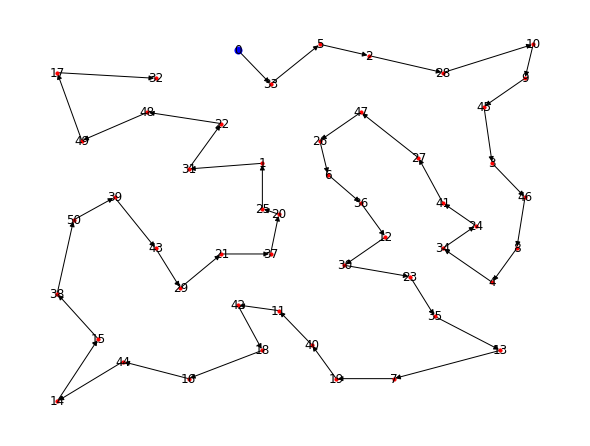

In [48]:
ortools_utils.plot_route(solution, points)